In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy import stats

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, feature_selection, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv('Manhattan12.csv', header = 4) ##selecting header 4 - this parameter tells Pandas to use the values in the third row as the column names

In [8]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,705,568",21/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1312,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,036,500",10/07/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1314,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",04/06/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1317,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,418,343",31/05/2013
9,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1318,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,749,275",24/05/2013


Show the shape of the dataset:

In [9]:
df.shape

(27395, 21)

Rename incorrectly formatted column names:

In [10]:
df = df.rename(columns={'SALE\nPRICE':'SALE PRICE'})

In [11]:
df = df.rename(columns={'APART\nMENT\nNUMBER':'APARTMENT NUMBER'})

In [12]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27391,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27392,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27393,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


Create list of categorical variables: 

In [13]:
cat_variables = list(df.select_dtypes(include=['category', 'object']))

In [14]:
cat_variables  # to confirm

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'RESIDENTIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

Create list for numerical variables:

In [15]:
num_variables = list(df.select_dtypes(include=['int', 'float']))

In [16]:
num_variables

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE']

In [17]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace(',','')

In [18]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace('$','', regex = True)  #regex = true parameter used to enssure that the replacement string is treated as regex, ensuring the $ is treated as a literal string - as a future warning message appeared

In [19]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637,15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565,13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,0,29/04/2013
27391,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,495000,26/06/2013
27392,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,0,02/04/2013
27393,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,0,26/06/2013


In [20]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [21]:
num_variables  # double checking if sale price is now included

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE']

Convert the 'SALE DATE' to datetime:

In [22]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format = '%d/%m/%Y') #speicifying the formate ensures that the dates are parsed consistently and accuratetly.

For each categorical variable, remove the spaces, and then replace the empty string '' by NaN.

In [23]:
## looping over each categorical column and us the str.strip() method to remove spaces and replace the now empty strings with Nan values using numpy
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().replace('', np.nan)

In [24]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1306,NaN,NaN,345 WEST 14TH STREET,NaN,...,0,0,0,0,0,0,2,R4,2214693,2013-05-20
1,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1307,NaN,NaN,345 WEST 14TH STREET,NaN,...,0,0,0,0,0,0,2,R4,1654656,2013-05-16
2,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1308,NaN,NaN,345 WEST 14TH STREET,NaN,...,0,0,0,0,0,0,2,R4,1069162,2013-05-23
3,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1309,NaN,NaN,345 WEST 14TH STREET,NaN,...,0,0,0,0,0,0,2,R4,1374637,2013-05-15
4,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1310,NaN,NaN,345 WEST 14TH STREET,NaN,...,0,0,0,0,0,0,2,R4,1649565,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,NaN,V1,44 FAIRVIEW AVENUE,NaN,...,0,0,0,"16,217",0,0,4,V1,0,2013-04-29
27391,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,NaN,V1,BENNETT AVENUE,NaN,...,0,0,0,"4,150",0,0,4,V1,495000,2013-06-26
27392,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,NaN,V1,BENNETT AVENUE,NaN,...,0,0,0,"4,150",0,0,4,V1,0,2013-04-02
27393,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,NaN,V1,N/A MAGAW PLACE,NaN,...,0,0,0,760,0,0,4,V1,0,2013-06-26


Replace the zeros in Prices, Land squares, etc. by NaN:

In [25]:
df.replace(0,np.nan, inplace=True)

In [26]:
df['RESIDENTIAL UNITS'].dtype

dtype('O')

In [27]:
df['RESIDENTIAL UNITS'] = df['RESIDENTIAL UNITS'].str.replace(',', '')  ##removing any commas from the string and then converting it to a numeric data type

In [28]:
df['RESIDENTIAL UNITS'] = pd.to_numeric (df['RESIDENTIAL UNITS']) ## convert non-numeric data types to numeric data types allowing the drop of the zeros

In [29]:
df['TOTAL UNITS'] = df['TOTAL UNITS'].str.replace(',', '')  

In [30]:
df['TOTAL UNITS'] = pd.to_numeric (df['TOTAL UNITS'])

In [31]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace(',', '')

In [32]:
df['LAND SQUARE FEET'] = pd.to_numeric (df['LAND SQUARE FEET'])

In [33]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(',', '')

In [34]:
df['GROSS SQUARE FEET'] = pd.to_numeric (df['GROSS SQUARE FEET'])

In [35]:
df.replace(0,np.nan, inplace=True)

In [36]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1306,NaN,NaN,345 WEST 14TH STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,2214693.0,2013-05-20
1,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1307,NaN,NaN,345 WEST 14TH STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1654656.0,2013-05-16
2,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1308,NaN,NaN,345 WEST 14TH STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1069162.0,2013-05-23
3,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1309,NaN,NaN,345 WEST 14TH STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1374637.0,2013-05-15
4,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1310,NaN,NaN,345 WEST 14TH STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1649565.0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,NaN,V1,44 FAIRVIEW AVENUE,NaN,...,NaN,NaN,NaN,16217.0,NaN,NaN,4,V1,NaN,2013-04-29
27391,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,NaN,V1,BENNETT AVENUE,NaN,...,NaN,NaN,NaN,4150.0,NaN,NaN,4,V1,495000.0,2013-06-26
27392,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,NaN,V1,BENNETT AVENUE,NaN,...,NaN,NaN,NaN,4150.0,NaN,NaN,4,V1,NaN,2013-04-02
27393,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,NaN,V1,N/A MAGAW PLACE,NaN,...,NaN,NaN,NaN,760.0,NaN,NaN,4,V1,NaN,2013-06-26


Summary statistics

In [37]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27395.0,27395.000000,27395.000000,0.0,27394.000000,11023.000000,3433.000000,17691.000000,4489.000000,4.326000e+03,20954.000000,27395.000000,1.980200e+04
mean,1.0,1109.666728,741.789086,NaN,10029.226217,4.390003,2.992426,3.545249,5893.466028,6.061620e+04,1953.080557,2.488118,2.556609e+06
std,0.0,465.994469,819.422424,NaN,34.966983,23.260831,12.689861,19.482767,7884.729624,8.111694e+04,37.692641,0.891723,1.916295e+07
min,1.0,7.000000,1.000000,NaN,10001.000000,1.000000,1.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,NaN,10016.000000,1.000000,1.000000,1.000000,2104.000000,6.198500e+03,1920.000000,2.000000,3.676662e+05
50%,1.0,1047.000000,1007.000000,NaN,10019.000000,1.000000,2.000000,1.000000,5046.000000,2.337150e+04,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,NaN,10027.000000,1.000000,2.000000,1.000000,7532.000000,1.128500e+05,1987.000000,4.000000,1.627399e+06
max,1.0,2250.000000,9117.000000,NaN,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


Summary of missing values:

In [38]:
missing_vals = df.isnull().sum()
missing_vals

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER':

In [39]:
cols = ['BOROUGH','EASE-MENT','APARTMENT NUMBER']

In [40]:
df = df.drop(['BOROUGH'], axis=1)


In [41]:
df = df.drop(['EASE-MENT'], axis=1)
df = df.drop(['APARTMENT NUMBER'], axis=1)

In [42]:
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1306,NaN,345 WEST 14TH STREET,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,2214693.0,2013-05-20
1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1307,NaN,345 WEST 14TH STREET,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1654656.0,2013-05-16
2,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1308,NaN,345 WEST 14TH STREET,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1069162.0,2013-05-23
3,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1309,NaN,345 WEST 14TH STREET,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1374637.0,2013-05-15
4,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1310,NaN,345 WEST 14TH STREET,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1649565.0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,V1,44 FAIRVIEW AVENUE,10040.0,NaN,NaN,NaN,16217.0,NaN,NaN,4,V1,NaN,2013-04-29
27391,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,V1,BENNETT AVENUE,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,V1,495000.0,2013-06-26
27392,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,V1,BENNETT AVENUE,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,V1,NaN,2013-04-02
27393,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,V1,N/A MAGAW PLACE,10033.0,NaN,NaN,NaN,760.0,NaN,NaN,4,V1,NaN,2013-06-26


Drop duplicates if there are any

In [43]:
duplicate_vals = df.duplicated()

In [44]:
duplicate_vals.sum()  ## number of duplicated values, confirms that there are duplicated valyes which will be delected

1593

In [45]:
df.drop_duplicates(inplace=True)

Drop rows with NaN values

In [46]:
df =df.dropna()

In [47]:
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
24,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,385,1,C7,17 AVENUE B,10009.0,7.0,1.0,8.0,2093.0,5852.0,1997.0,2,C7,283.0,2013-04-18
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,C7,13185684.0,2013-01-31
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,C7,3810602.0,2012-10-26
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,C4,7333333.0,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,C4,7333333.0,2013-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,13,C7,500 FT WASHINGTON AVENUE,10033.0,56.0,1.0,57.0,14150.0,44295.0,1925.0,2,C7,8620000.0,2013-03-22
27059,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,120,C7,4321 BROADWAY,10033.0,69.0,5.0,74.0,12400.0,54000.0,1949.0,2,C7,11400000.0,2013-04-11
27060,WASHINGTON HEIGHTS UPPER,08 RENTALS - ELEVATOR APARTMENTS,2,2158,16,D7,440 AUDUBON AVENUE,10040.0,68.0,3.0,71.0,14231.0,66240.0,1911.0,2,D7,7810000.0,2012-08-29
27064,WASHINGTON HEIGHTS UPPER,08 RENTALS - ELEVATOR APARTMENTS,2,2175,33,D7,4720 BROADWAY,10040.0,50.0,2.0,52.0,12050.0,52378.0,1920.0,2,D7,11360000.0,2013-05-30


In [48]:
miss_num = df.isna().sum()

In [49]:
miss_num

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Identify and remove outliers if any

In [50]:
## using the Z score can measure how many standard devisations a data point is from the mean - scores greater than the threshold can be considered outliers, smaller datasets use 2(95%) 
##and larger datasets use 4 (99%)

In [51]:
## make new numerical column variables
num_variables2 = list(df.select_dtypes(include=['int', 'float']))

In [52]:
num_variables2

['BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE']

In [53]:
num_df = df.select_dtypes(include = ['int','float'])

In [54]:
num_df

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
24,385,1,10009.0,7.0,1.0,8.0,2093.0,5852.0,1997.0,2,283.0
26,397,33,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,13185684.0
30,398,53,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,3810602.0
31,400,56,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,7333333.0
32,400,57,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,7333333.0
...,...,...,...,...,...,...,...,...,...,...,...
27057,2180,13,10033.0,56.0,1.0,57.0,14150.0,44295.0,1925.0,2,8620000.0
27059,2180,120,10033.0,69.0,5.0,74.0,12400.0,54000.0,1949.0,2,11400000.0
27060,2158,16,10040.0,68.0,3.0,71.0,14231.0,66240.0,1911.0,2,7810000.0
27064,2175,33,10040.0,50.0,2.0,52.0,12050.0,52378.0,1920.0,2,11360000.0


In [55]:
def removing_outliers (df, threshold =2):
    num_df = df.select_dtypes(include = ['int','float'])
    z = np.abs((num_df - num_df.mean()) / num_df.std())  ## calclulating the z score for numerical columns in the dataframe
    outliers = df[(z > threshold).any(axis=1)]  ## outliers identified in the datframe
    
    
    return df[(z <= threshold).all (axis =1)]    ## returns a df with the removal of outliers from the dataframe

In [56]:
df = removing_outliers (df, threshold=2)

In [57]:
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,C7,13185684.0,2013-01-31
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,C7,3810602.0,2012-10-26
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,C4,7333333.0,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,C4,7333333.0,2013-04-09
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009.0,9.0,1.0,10.0,2404.0,7110.0,1900.0,2,C4,7333333.0,2013-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27052,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2175,45,C7,4740 BROADWAY,10040.0,68.0,6.0,74.0,15800.0,58400.0,1920.0,2,C7,11300000.0,2013-02-21
27057,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,13,C7,500 FT WASHINGTON AVENUE,10033.0,56.0,1.0,57.0,14150.0,44295.0,1925.0,2,C7,8620000.0,2013-03-22
27059,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,120,C7,4321 BROADWAY,10033.0,69.0,5.0,74.0,12400.0,54000.0,1949.0,2,C7,11400000.0,2013-04-11
27060,WASHINGTON HEIGHTS UPPER,08 RENTALS - ELEVATOR APARTMENTS,2,2158,16,D7,440 AUDUBON AVENUE,10040.0,68.0,3.0,71.0,14231.0,66240.0,1911.0,2,D7,7810000.0,2012-08-29


Showing the shape

In [58]:
df.shape

(367, 18)

Consider the log of the prices and normalise the data.

In [59]:
## taking the log of the prices 
df_new = df.copy() ## making a copy of the df
df_new.loc[:,'SALE PRICE'] = np.log(df['SALE PRICE']) ## creating a log of the column in the new/copied dataframe

In [60]:
df_new

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,C7,16.394642,2013-01-31
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,C7,15.153298,2012-10-26
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,C4,15.807941,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,C4,15.807941,2013-04-09
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009.0,9.0,1.0,10.0,2404.0,7110.0,1900.0,2,C4,15.807941,2013-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27052,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2175,45,C7,4740 BROADWAY,10040.0,68.0,6.0,74.0,15800.0,58400.0,1920.0,2,C7,16.240313,2013-02-21
27057,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,13,C7,500 FT WASHINGTON AVENUE,10033.0,56.0,1.0,57.0,14150.0,44295.0,1925.0,2,C7,15.969596,2013-03-22
27059,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,120,C7,4321 BROADWAY,10033.0,69.0,5.0,74.0,12400.0,54000.0,1949.0,2,C7,16.249124,2013-04-11
27060,WASHINGTON HEIGHTS UPPER,08 RENTALS - ELEVATOR APARTMENTS,2,2158,16,D7,440 AUDUBON AVENUE,10040.0,68.0,3.0,71.0,14231.0,66240.0,1911.0,2,D7,15.870916,2012-08-29


In [61]:
#Note to future sam ,change this pls
df = df_new

Normalisation scales down the values to be between 0 and 1

In [62]:
# def normalise(df):
#     num_cols = df.select_dtypes(include=[np.number]).copy()
#     df_norm = ((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
#     return df_norm
# df = normalise(df)

In [63]:
scaler = MinMaxScaler()  #method transformes by scaling each feature to a give range (between 0 and 1)

In [64]:
#Convert the column values to a 2D numpy array and scale them
scaled_values = scaler.fit_transform(df[['SALE PRICE']].values)

In [65]:
#Replace the original column values with the scaled values
df['SALE PRICE'] = scaled_values

In [66]:
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,C7,0.913589,2013-01-31
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,C7,0.833112,2012-10-26
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,C4,0.875553,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,C4,0.875553,2013-04-09
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009.0,9.0,1.0,10.0,2404.0,7110.0,1900.0,2,C4,0.875553,2013-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27052,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2175,45,C7,4740 BROADWAY,10040.0,68.0,6.0,74.0,15800.0,58400.0,1920.0,2,C7,0.903583,2013-02-21
27057,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,13,C7,500 FT WASHINGTON AVENUE,10033.0,56.0,1.0,57.0,14150.0,44295.0,1925.0,2,C7,0.886033,2013-03-22
27059,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2180,120,C7,4321 BROADWAY,10033.0,69.0,5.0,74.0,12400.0,54000.0,1949.0,2,C7,0.904155,2013-04-11
27060,WASHINGTON HEIGHTS UPPER,08 RENTALS - ELEVATOR APARTMENTS,2,2158,16,D7,440 AUDUBON AVENUE,10040.0,68.0,3.0,71.0,14231.0,66240.0,1911.0,2,D7,0.879635,2012-08-29


In [67]:
df.shape

(367, 18)

# Data Exploration

Exploring relationships between the various features of the dataset.

Visualising the prices across neighbourhood:

In [68]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='NEIGHBORHOOD', y='SALE PRICE')
#plt.xticks(rotation=90)
#plt.title("Visualising the prices across neighborhood\n")
#plt.ylabel('SALE PRICE (log)\n')
#plt.show()

Visualise the prices over time

In [69]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='SALE DATE', y='SALE PRICE', color = 'navy')
#plt.title("Visualising the prices over time\n")
#plt.ylabel('SALE PRICE (log)\n')
#plt.show()


Show the scatter matrix plot and the correlation matrix


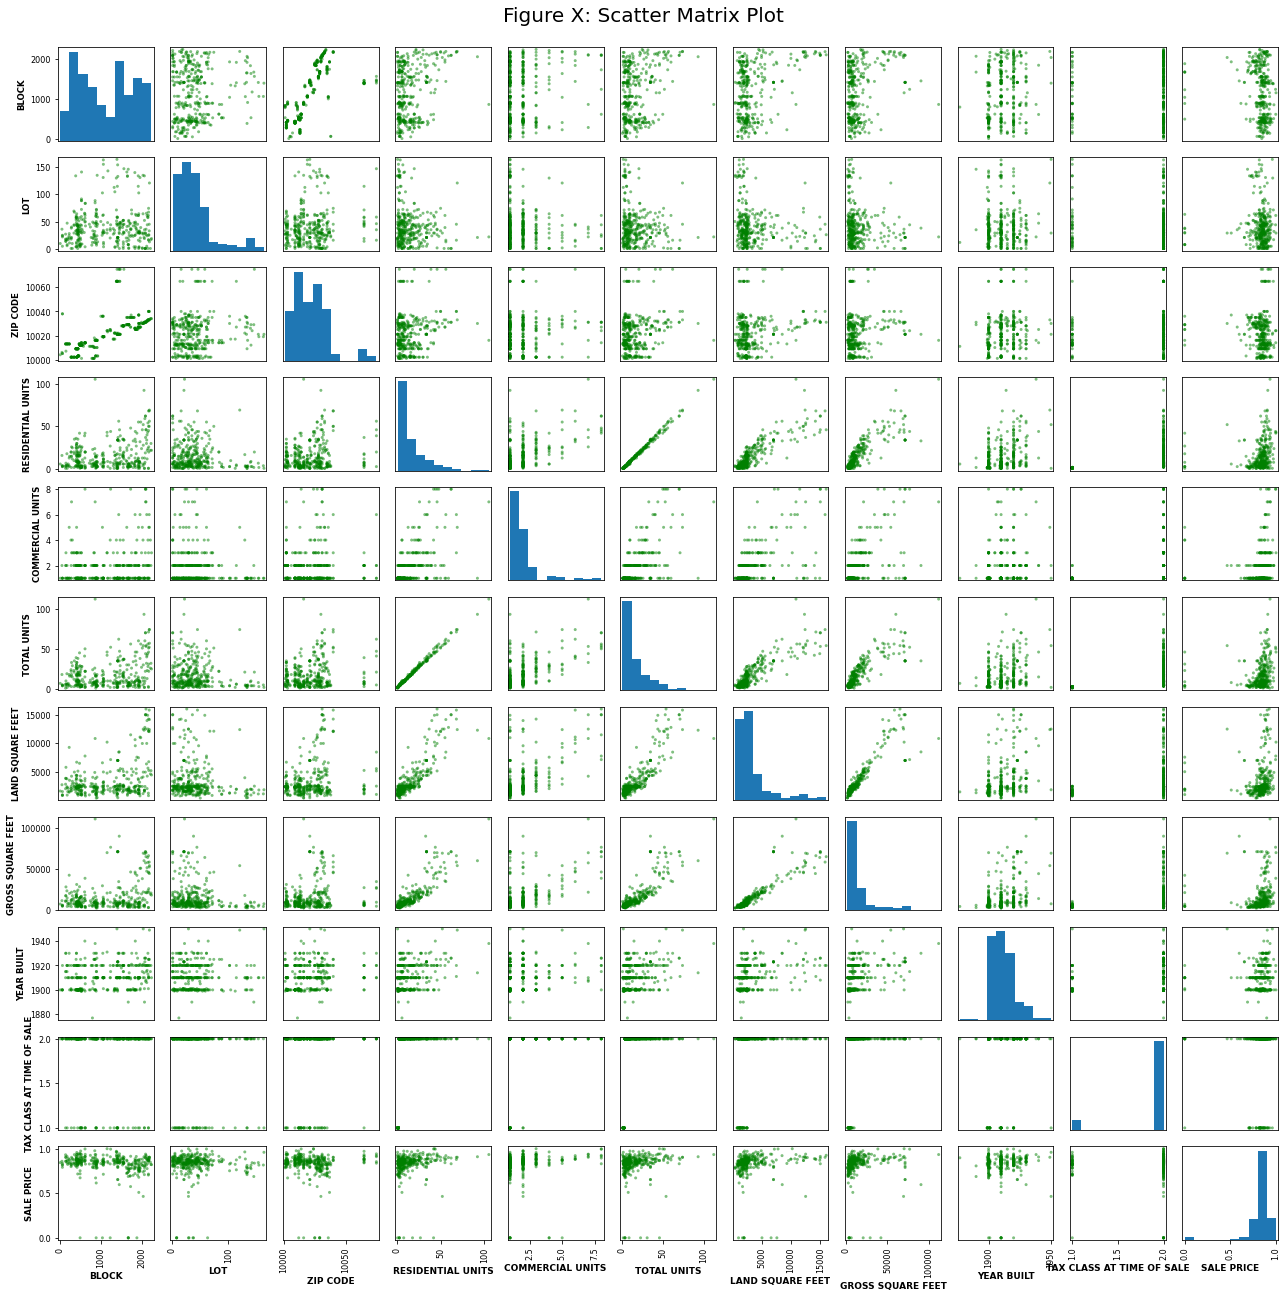

In [70]:
# create scatter matrix plot
scatt_matrix=pd.plotting.scatter_matrix(df, figsize=(18,18), diagonal='hist',color='green')
plt.suptitle('Figure X: Scatter Matrix Plot', fontsize=20,y=1)
plt.tight_layout()  ## gives the gaps inbetween
## now adjusting the axis lables for each subplot to make legible
for ax in scatt_matrix.flatten():
    # Set x label to corresponding variable name
    ax.set_xlabel(ax.get_xlabel(), fontsize=9)
    # Set y label to corresponding variable name
    ax.set_ylabel(ax.get_ylabel(), fontsize=8.6)
    #making the font of the text bolder
    ax.title.set_fontweight('bold')
    ax.xaxis.label.set_fontweight('bold')
    ax.yaxis.label.set_fontweight('bold')
plt.show()

Scatter plot marix allows the identifcation of possible correlations between a set of numerical variables. 
Shows how different input varaibles impact output variables

In [71]:
# create correlation matrix
corr_matrix = df.corr()

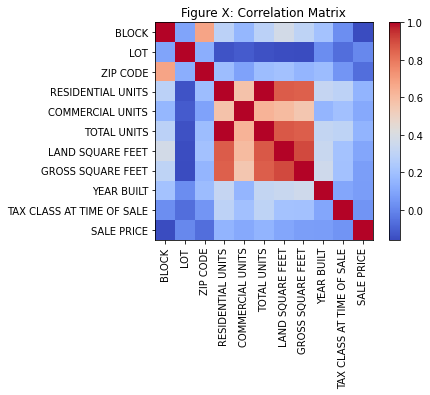

In [72]:
# plot correlation matrix
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Figure X: Correlation Matrix')
plt.show()

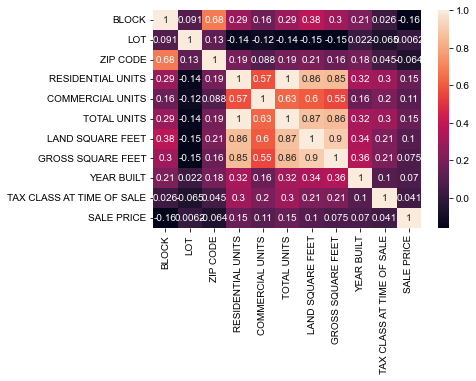

<Figure size 1296x1152 with 0 Axes>

In [73]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize = (18,16))
sns.set(font_scale=0.6)  ## adjsuting the font size of the numbers in the heatmap
plt.show()

Correlation matrixs are a useful tool to summarise data
It shows the degree of the linear relationship between variables in a dataset 


In [74]:
##plt.savefig('name.png')

In [75]:
features = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
X = df[features]
Y = df['SALE PRICE']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

lmodel = linear_model.LinearRegression()

lmodel.fit(trainX, trainY)

print(lmodel.score(trainX, trainY))

print(lmodel.score(testX, testY))

0.03656583060470309
0.03365791402588025
